In [ ]:
%matplotlib inline

from google.colab import files, drive    # upload
import numpy as np                       # mathematical calculations
from io import BytesIO                   # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from scipy import signal
import math
import plotly.express as px       # interactive plotting library
import cv2                        # function to read video,

In [ ]:
drive.mount('drive')
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Image Blending/copenhagen.png")
im = np.array(img)
img2 = Image.open("/content/drive/MyDrive/Colab Notebooks/Image Blending/centi.jpeg")
im2 = np.array(img2)

Mounted at drive


In [ ]:
im = im2

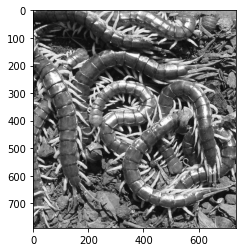

In [ ]:
im = 0.3*im[:,:,0] + 0.59*im[:,:,1] + 0.11*im[:,:,2]
plt.imshow(im, cmap='gray')

In [ ]:
# edge detect
kernel = np.array([
                   [1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]
])


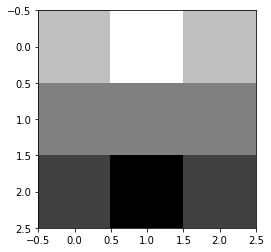

In [ ]:
plt.imshow(kernel, cmap='gray')

Sobel Kernel

In [ ]:
kernels = {}

In [ ]:
kernels['sobel_top'] = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]                     
])

kernels['sobel_bottom'] = (-1) * kernels['sobel_top']

kernels['sobel_left'] = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]                     
])

kernels['sobel_right'] = (-1) * kernels['sobel_left']

In [ ]:
altered = {}

In [ ]:
for i in kernels.keys():
  altered[i] = signal.convolve2d(im, kernels[i], mode='same')

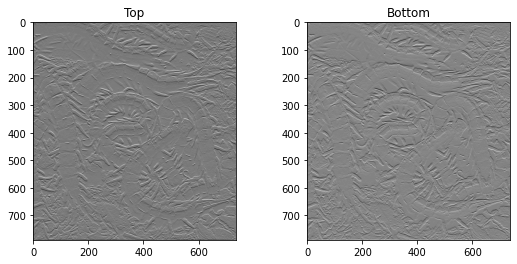

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=[9, 4])
ax0.set_title("Top")
ax1.set_title("Bottom")

im0 = ax0.imshow(altered['sobel_top'], cmap='gray')
im1 = ax1.imshow(altered['sobel_bottom'], cmap='gray')

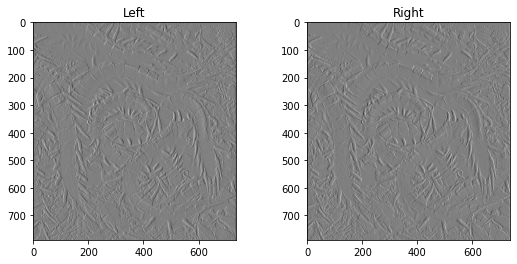

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=[9, 4])
ax0.set_title("Left")
ax1.set_title("Right")

im0 = ax0.imshow(altered['sobel_left'], cmap='gray')
im1 = ax1.imshow(altered['sobel_right'], cmap='gray')

In [ ]:
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]   
])

In [ ]:
identity_altered = signal.convolve2d(im, identity_kernel, mode='same')

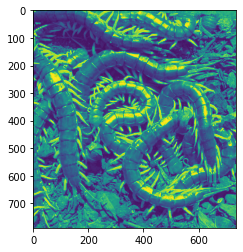

In [ ]:
plt.imshow(identity_altered)

In [ ]:
top_and_left = np.sqrt(np.square(altered['sobel_top']) + np.square(altered['sobel_left']))

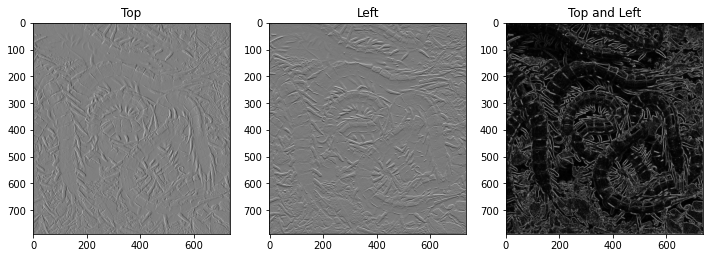

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=[12, 4])
ax0.set_title("Top")
ax1.set_title("Left")
ax2.set_title("Top and Left")

im0 = ax0.imshow(altered['sobel_left'], cmap='gray')
im1 = ax1.imshow(altered['sobel_top'], cmap='gray')
im2 = ax2.imshow(top_and_left, cmap='gray')

Gamma Correction

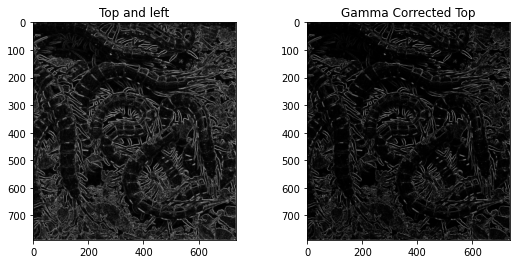

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=[9, 4])
ax0.set_title("Top and left")
ax1.set_title("Gamma Corrected Top")

im0 = ax0.imshow(top_and_left, cmap='gray')
im1 = ax1.imshow(np.power(np.abs(top_and_left), 1.5), cmap='gray')